In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

import qiskit
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import random_statevector, Statevector, partial_trace

In [2]:
def qft(n):
    """n-qubit QFT the first n qubits in circuit"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT"
    return qc

def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circuit"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT"
    return qc

In [3]:
circuit_a = QuantumCircuit(4, 4)
for qubit in range(4):
    circuit_a.h(qubit)
circuit_a.rz(pi, 0)

circuit_a.barrier()

# qft_dagger
circuit_a.append(qft_dagger(4), range(4))
circuit_a.barrier()

circuit_a.measure(0, 0)
circuit_a.measure(1, 1)
circuit_a.measure(2, 2)
circuit_a.measure(3, 3)

circuit_a.draw()

C:\Users\User\AppData\Local\Temp\ipykernel_26296\3016227967.py:22: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-np.pi/float(2**(j-m)), m, j)


┌───┐┌───────┐ ░ ┌──────┐ ░ ┌─┐         
q_0: ┤ H ├┤ Rz(π) ├─░─┤0     ├─░─┤M├─────────
     ├───┤└───────┘ ░ │      │ ░ └╥┘┌─┐      
q_1: ┤ H ├──────────░─┤1     ├─░──╫─┤M├──────
     ├───┤          ░ │  QFT │ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├──────────░─┤2     ├─░──╫──╫─┤M├───
     ├───┤          ░ │      │ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────────░─┤3     ├─░──╫──╫──╫─┤M├
     └───┘          ░ └──────┘ ░  ║  ║  ║ └╥┘
c: 4/═════════════════════════════╩══╩══╩══╩═
                                  0  1  2  3

In [4]:
circuit_b = QuantumCircuit(4, 4)
for qubit in range(4):
    circuit_b.h(qubit)
circuit_b.rz(pi/2, 0)
circuit_b.ry(pi, 1)

circuit_b.barrier()

# qft_dagger
circuit_b.append(qft_dagger(4), range(4))
circuit_b.barrier()

circuit_b.measure(0, 0)
circuit_b.measure(1, 1)
circuit_b.measure(2, 2)
circuit_b.measure(3, 3)

circuit_b.draw()

C:\Users\User\AppData\Local\Temp\ipykernel_26296\3016227967.py:22: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-np.pi/float(2**(j-m)), m, j)


┌───┐┌─────────┐ ░ ┌──────┐ ░ ┌─┐         
q_0: ┤ H ├┤ Rz(π/2) ├─░─┤0     ├─░─┤M├─────────
     ├───┤└┬───────┬┘ ░ │      │ ░ └╥┘┌─┐      
q_1: ┤ H ├─┤ Ry(π) ├──░─┤1     ├─░──╫─┤M├──────
     ├───┤ └───────┘  ░ │  QFT │ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├────────────░─┤2     ├─░──╫──╫─┤M├───
     ├───┤            ░ │      │ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├────────────░─┤3     ├─░──╫──╫──╫─┤M├
     └───┘            ░ └──────┘ ░  ║  ║  ║ └╥┘
c: 4/═══════════════════════════════╩══╩══╩══╩═
                                    0  1  2  3

In [5]:
circuit_c = QuantumCircuit(4, 4)
for qubit in range(4):
    circuit_c.h(qubit)
circuit_c.rz(pi/4, 0)
circuit_c.rz(pi/2, 1)
circuit_c.rz(pi, 2)

circuit_c.barrier()

# qft_dagger
circuit_c.append(qft_dagger(4), range(4))
circuit_c.barrier()

circuit_c.measure(0, 0)
circuit_c.measure(1, 1)
circuit_c.measure(2, 2)
circuit_c.measure(3, 3)

circuit_c.draw()

C:\Users\User\AppData\Local\Temp\ipykernel_26296\3016227967.py:22: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-np.pi/float(2**(j-m)), m, j)


┌───┐┌─────────┐ ░ ┌──────┐ ░ ┌─┐         
q_0: ┤ H ├┤ Rz(π/4) ├─░─┤0     ├─░─┤M├─────────
     ├───┤├─────────┤ ░ │      │ ░ └╥┘┌─┐      
q_1: ┤ H ├┤ Rz(π/2) ├─░─┤1     ├─░──╫─┤M├──────
     ├───┤└┬───────┬┘ ░ │  QFT │ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├─┤ Rz(π) ├──░─┤2     ├─░──╫──╫─┤M├───
     ├───┤ └───────┘  ░ │      │ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├────────────░─┤3     ├─░──╫──╫──╫─┤M├
     └───┘            ░ └──────┘ ░  ║  ║  ║ └╥┘
c: 4/═══════════════════════════════╩══╩══╩══╩═
                                    0  1  2  3

{'1000': 1024}


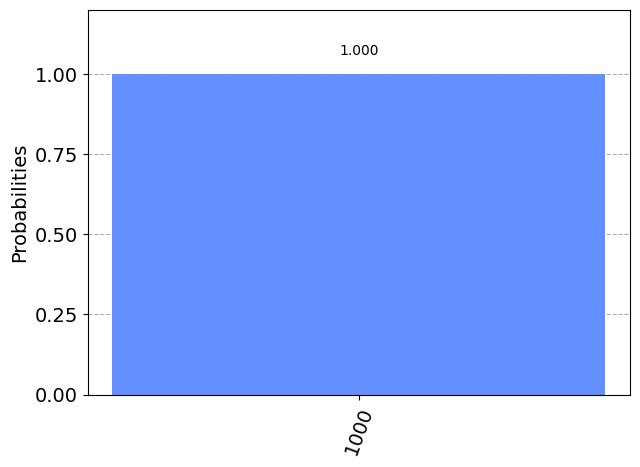

In [6]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit_a, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

{'0100': 1024}


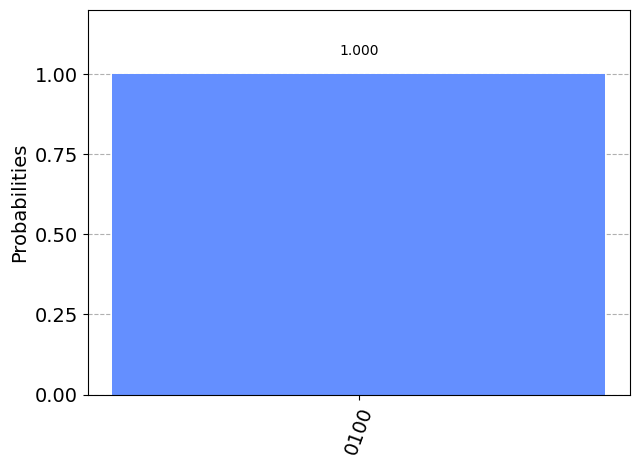

In [7]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit_b, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

{'0010': 1024}


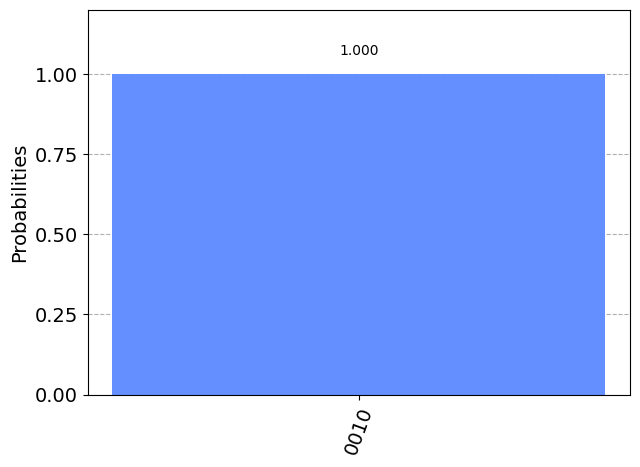

In [8]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit_c, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)